In [8]:
import fitz
import re
from nltk.corpus import stopwords
from nltk import download
download('stopwords')

STOP_WORDS = set(stopwords.words("english"))

# Header standardization mapping
HEADER_GROUPS = {
    "about": ["about", "summary", "about me", "objective"],
    "education": ["education", "education details"],
    "skills": ["technical skills", "skills", "expertise", "strengths and expertise"],
    "experience": ["experience", "professional experience", "projects", "project experience"],
    "additional_information": ["additional information", "more about me", "certifications"]
}

def normalize_text(text):
    return re.sub(r'\s+', ' ', text.strip().lower())

def clean_text(text):
    words = re.findall(r'\b\w+\b', text)
    filtered = [w for w in words if w.lower() not in STOP_WORDS]
    return " ".join(filtered)

def match_standard_header(text):
    norm = normalize_text(text)
    for std_key, synonyms in HEADER_GROUPS.items():
        for variant in synonyms:
            if norm.startswith(variant):
                return std_key
    return None
    
def extract_sections_as_json(file_bytes, spacing_threshold=20):
    doc = fitz.open(stream=file_bytes, filetype="pdf")

    all_blocks = []

    for page in doc:
        blocks = page.get_text("blocks")
        blocks = [b for b in blocks if b[4].strip()]
        all_blocks.extend(blocks)

    all_blocks.sort(key=lambda b: b[1])  # top to bottom sorting

    # Get topmost block for header
    topmost_block = min(all_blocks, key=lambda b: b[1])
    result = {"header": topmost_block[4].strip()}

    # Group into visual sections by vertical spacing
    sections = []
    current_section = []
    prev_y1 = None

    for block in all_blocks:
        x0, y0, x1, y1, text, *_ = block
        if prev_y1 is not None and (y0 - prev_y1) > spacing_threshold:
            if current_section:
                sections.append(current_section)
                current_section = []
        current_section.append(block)
        prev_y1 = y1

    if current_section:
        sections.append(current_section)

    # Scan for headers
    current_key = None
    section_data = {}

    for section in sections:
        for block in section:
            raw_text = block[4].strip()
            std_key = match_standard_header(raw_text)
            if std_key:
                current_key = std_key
                if current_key not in section_data:
                    section_data[current_key] = []
            elif current_key:
                section_data[current_key].append(raw_text)

    # Clean and assign to result
    for key, texts in section_data.items():
        full_text = " ".join(texts)
        cleaned = clean_text(full_text)
        result[key] = cleaned

    return result

filename = "Vyshnavi_kunapareddy_resume.pdf"  # make sure this file exists in the same folder

# Open the file in binary mode
with open(filename, "rb") as f:
    file_bytes = f.read()

# Call the extraction function
sections = extract_sections_as_json(file_bytes)

# Print the structured output
from pprint import pprint
pprint(sections)

{'additional_information': 'Languages English Hindi Telugu Certifications AWS '
                           'Cloud Foundations Python Developer Intern Algonox '
                           'Technologies Feb 2023 Sep 2023 Designed coded APIs '
                           'implement key features product Successfully '
                           'developed integrated text classification feature '
                           'identifies type page within PDF streamlining PDF '
                           'processing workflow Utilized Python libraries '
                           'Pandas NumPy Scikit learn data manipulation '
                           'analysis Involved comprehensive data preparation '
                           'gathering cleaning support page detection feature',
 'education': 'Software Developer Python ML 2019 2023 B Tech CSE 8 5 CGPA '
              'Hyderabad 9441569939 vyshnavikunapareddy gmail com GitHub '
              'LinkedIn International Institute Information Technol

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


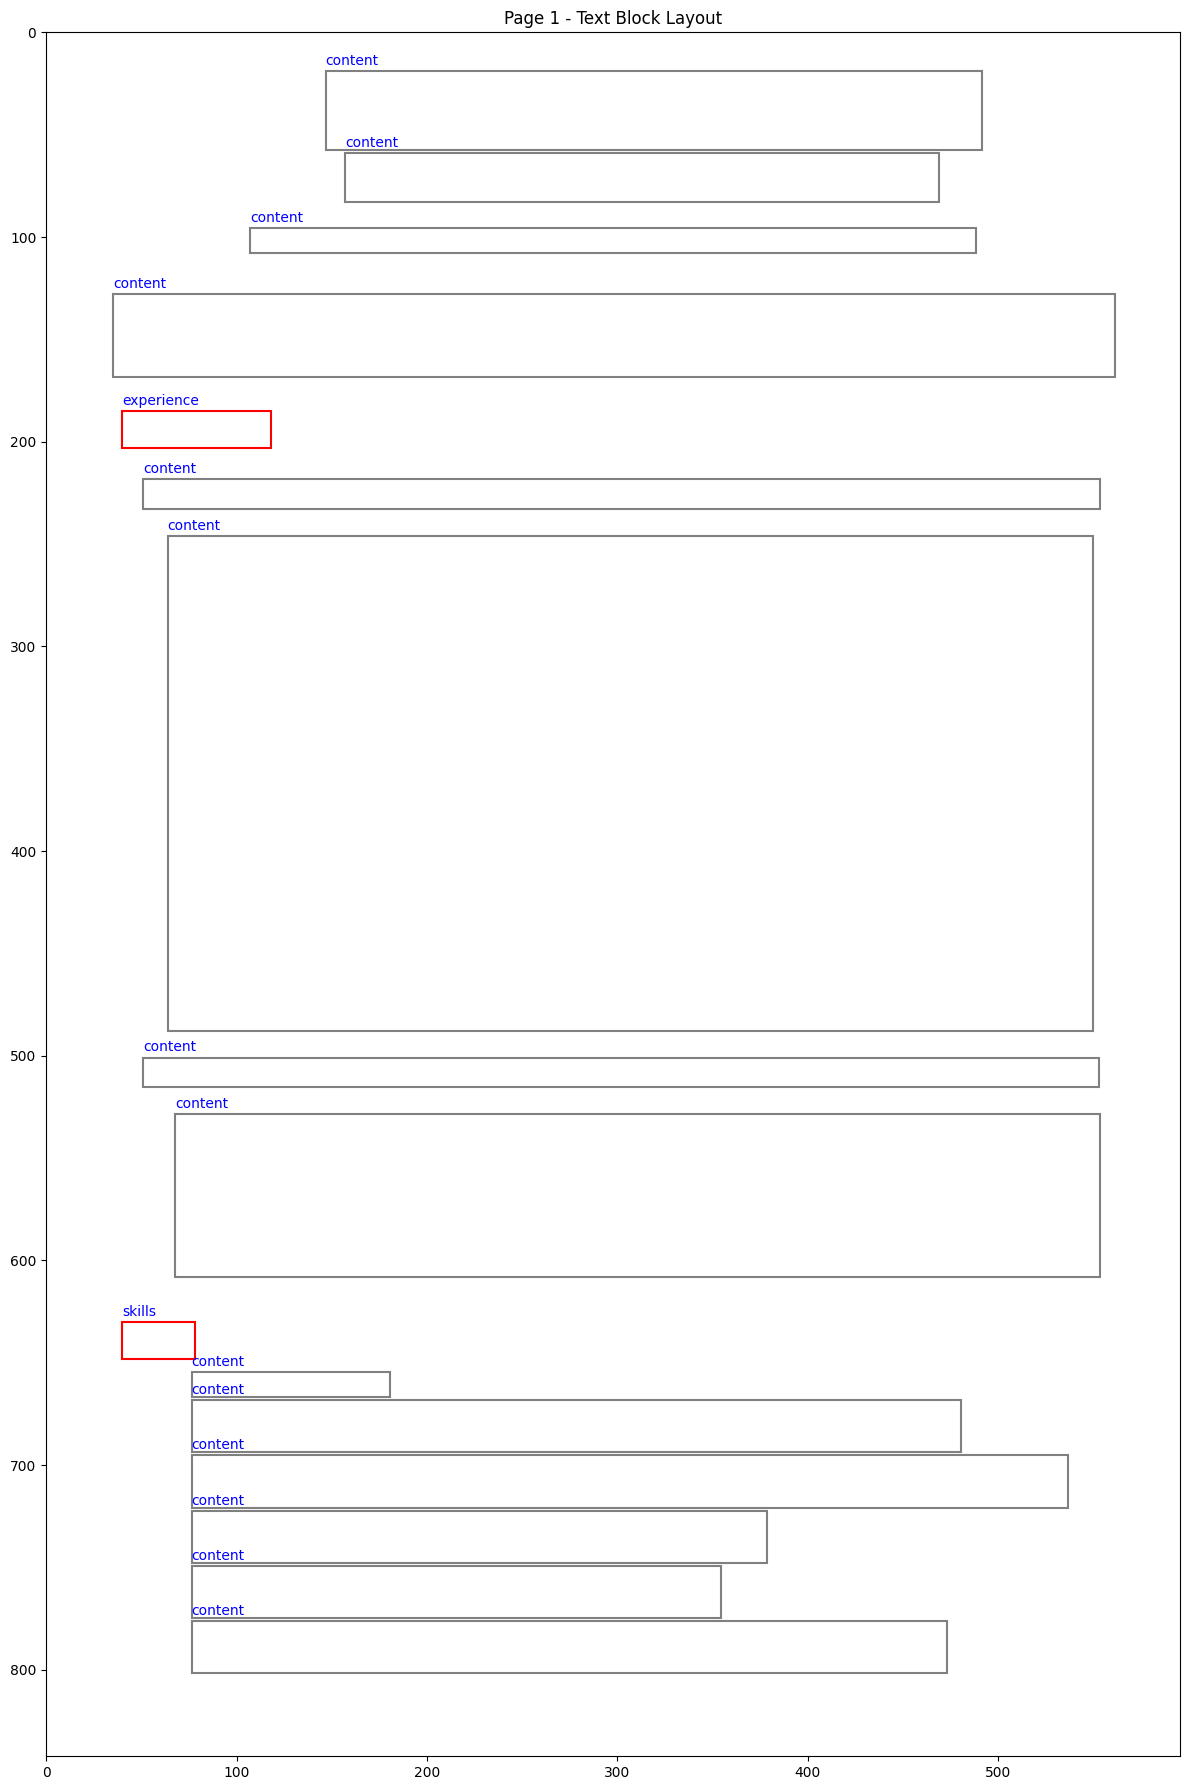

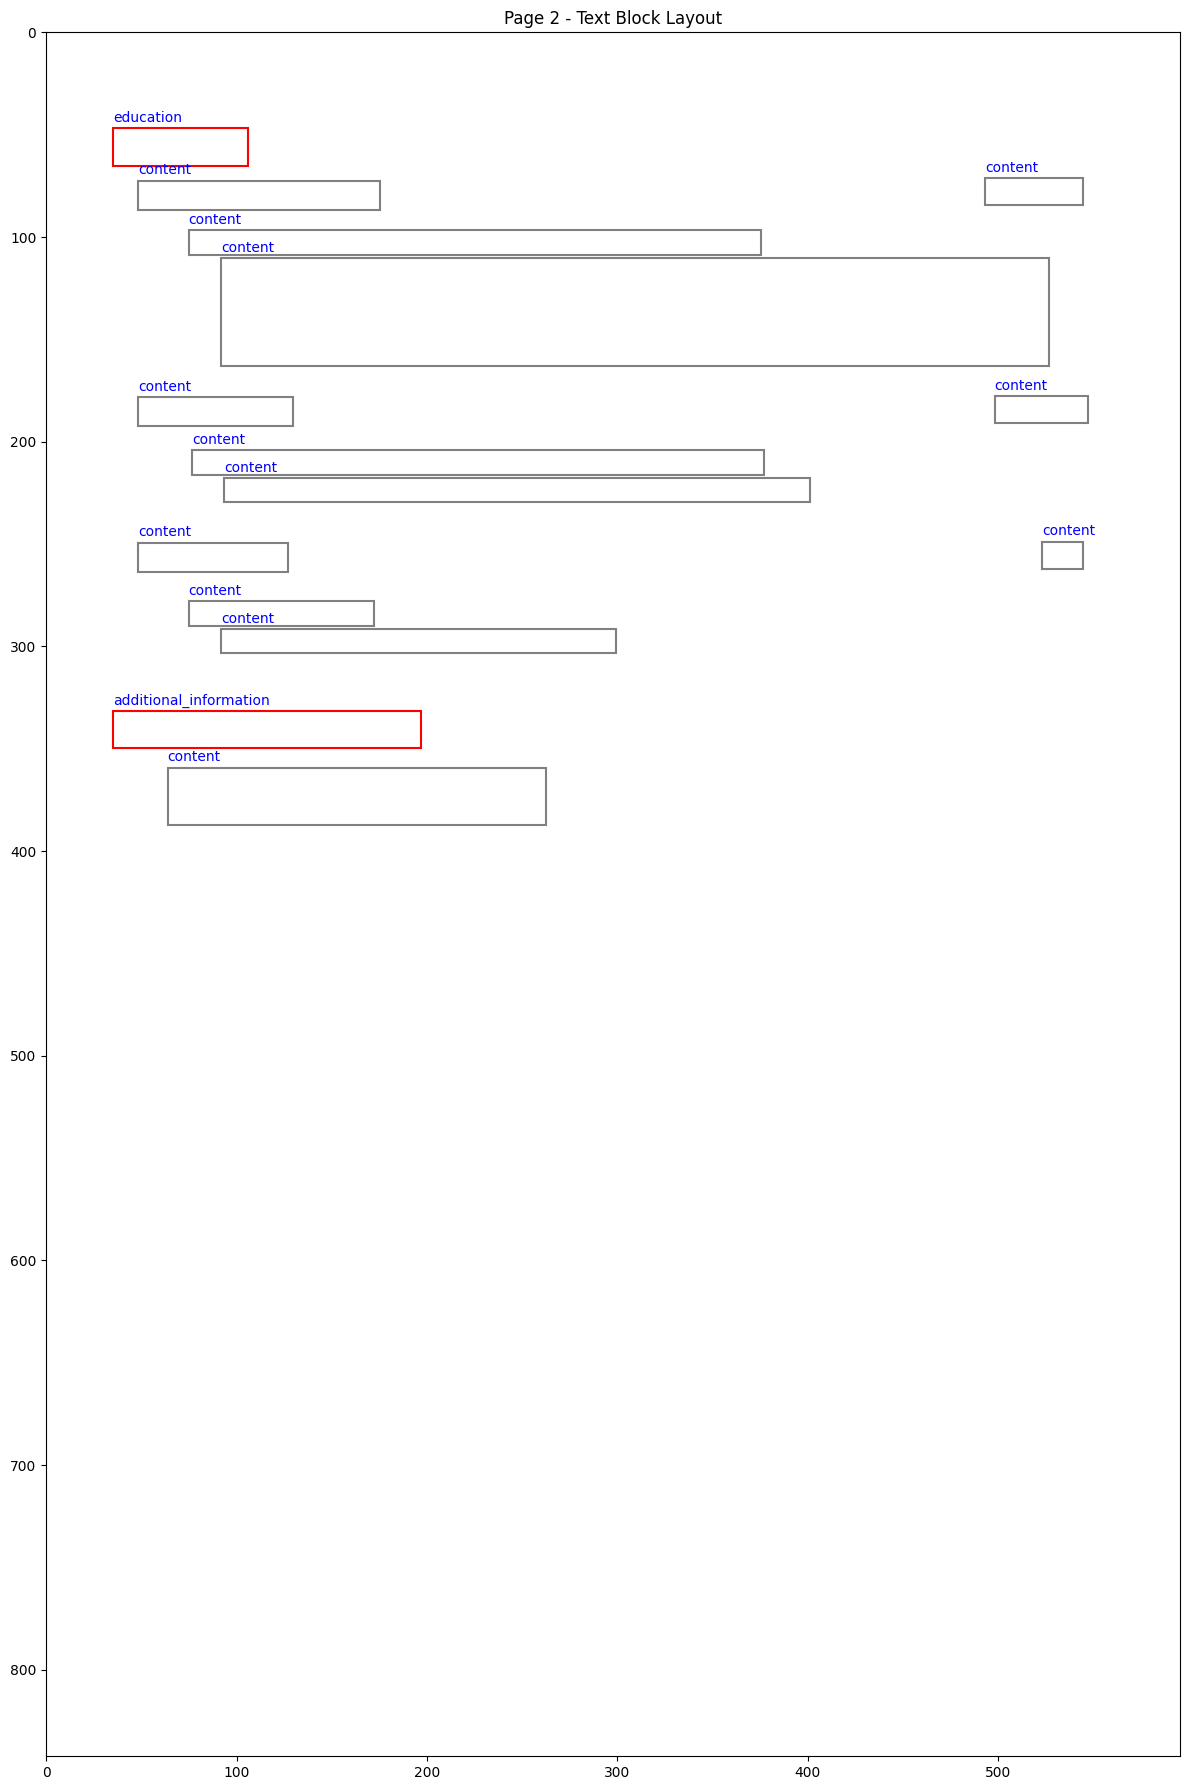

In [9]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define your headers mapping
HEADER_GROUPS = {
    "about": ["about", "summary", "about me", "objective"],
    "education": ["education", "education details"],
    "skills": ["technical skills", "skills", "expertise", "strengths and expertise"],
    "experience": ["experience", "professional experience", "projects", "project experience"],
    "additional_information": ["additional information", "more about me", "certifications"]
}

def normalize_text(text):
    return re.sub(r'\s+', ' ', text.strip().lower())

def match_standard_header(text):
    norm = normalize_text(text)
    for std_key, variants in HEADER_GROUPS.items():
        for variant in variants:
            if norm.startswith(variant):
                return std_key
    return None

def visualize_pdf_layout_sections(pdf_path):
    doc = fitz.open(pdf_path)

    for page_num, page in enumerate(doc):
        fig, ax = plt.subplots(figsize=(12, 18))
        ax.set_xlim(0, page.rect.width)
        ax.set_ylim(0, page.rect.height)
        ax.invert_yaxis()
        ax.set_title(f"Page {page_num+1} - Text Block Layout")

        blocks = page.get_text("blocks")
        for block in blocks:
            x0, y0, x1, y1, text, *_ = block
            if not text.strip():
                continue

            std_header = match_standard_header(text)
            label = std_header if std_header else "content"

            rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0,
                                     linewidth=1.5,
                                     edgecolor='red' if std_header else 'gray',
                                     facecolor='none')
            ax.add_patch(rect)
            ax.text(x0, y0 - 3, label, fontsize=10, color='blue')

        plt.tight_layout()
        plt.show()

# Example usage
visualize_pdf_layout_sections("Vyshnavi_kunapareddy_resume.pdf")


In [12]:
import fitz  # PyMuPDF
import re
from nltk.corpus import stopwords
from nltk import download
import json

download('stopwords')
STOP_WORDS = set(stopwords.words("english"))

HEADER_GROUPS = {
    "about": ["about", "summary", "about me", "objective"],
    "education": ["education", "education details"],
    "skills": ["technical skills", "skills", "expertise", "strengths and expertise"],
    "experience": ["experience", "professional experience", "projects", "project experience"],
    "additional_information": ["additional information", "more about me", "certifications"]
}


def normalize_text(text):
    return re.sub(r'\s+', ' ', text.strip().lower())


def match_standard_header(text):
    norm = normalize_text(text)
    for std_key, variants in HEADER_GROUPS.items():
        for variant in variants:
            if norm.startswith(variant):
                return std_key
    return None


def clean_text(text):
    words = re.findall(r'\b\w+\b', text)
    filtered = [w for w in words if w.lower() not in STOP_WORDS]
    return " ".join(filtered)


def extract_sections_as_json2(pdf_path):
    doc = fitz.open(pdf_path)
    result = {}
    current_section = None

    for page in doc:
        blocks = page.get_text("blocks")
        blocks = [b for b in blocks if b[4].strip()]
        blocks.sort(key=lambda b: (b[1], b[0]))  # top to bottom, left to right

        for block in blocks:
            text = block[4].strip()
            section_key = match_standard_header(text)

            if section_key:
                current_section = section_key
                if section_key not in result:
                    result[section_key] = []
            elif current_section:
                result[current_section].append(text)

    # Final cleaning + merge section text
    for key in result:
        result[key] = " ".join(result[key]).strip()

    # Also extract topmost block as header
    first_page_blocks = doc[0].get_text("blocks")
    first_page_blocks = [b for b in first_page_blocks if b[4].strip()]
    topmost = min(first_page_blocks, key=lambda b: b[1])[4].strip()
    result["header"] = topmost

    return result

data = extract_sections_as_json2("Vyshnavi_kunapareddy_resume.pdf")
print(json.dumps(data, indent=2))

{
  "experience": "Python Developer | Product  - ML & Backend\nAlgonox Technologies | Sep 2023 - Present Developed a feature which uses machine learning models integrated to perform key functionality of\nproduct - extraction, Published the developed feature as a microservice, contributing to the product's\nmodular architecture, This feature improved the functionality performance from 50% to 75%.\nConducted extensive data training and preparation to support model development.\nCoordinated with databases, writing Python scripts for data migration between MSSQL and PostgreSQL.\nDesigned a robust, generic data migration script that efficiently transformed and migrated\napproximately 600 million records into PostgreSQL.\nImproved database performance by optimizing queries through a thorough analysis of database logs.\nDeveloped and maintained microservices and Docker-based applications, along with Lambda-based\nsolutions to support scalable architectures.\nDemonstrated proficiency in testin

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
